<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/00_BraketSDK_Managed(On_Demand)SimulatorOrQPU_mkbahk_20240927.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon: 회사이름
##amazon.com: 전자상거래 사이트
##AWS(Amazon Web Service): Amazon이 만들 Public Cloud 이름
##Amazon Braket: AWS내에 Quantum Service 이름
##Braket SDK: Qiskit, PennyLane, Q#, Cirq와 같은 수준의 Pyhton기반 Quantum 회로를 작성할 수 있는 Library집합, Quantum SDK 또는 QDK, AI로 말하는 Tensorflow, Pytorch와 같은 Framework

In [1]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [2]:
!pip install "numpy>=1.24,<1.26" matplotlib==3.9.2 scipy==1.14.1 amazon-braket-sdk==1.88.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.8/537.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 13.1 MB/s eta 0:00:

In [3]:
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.88.1
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/amazon-braket/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: amazon-braket-default-simulator, amazon-braket-schemas, backoff, backports.entry-points-selectable, boltons, boto3, cloudpickle, nest-asyncio, networkx, numpy, openpulse, openqasm3, oqpy, sympy
Required-by: 


#비용 추적 코드

In [44]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [5]:
import os
# Set environment variables for AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = ""
os.environ['AWS_SECRET_ACCESS_KEY'] = ""
os.environ['AWS_DEFAULT_REGION'] = "us-east-1"

# You can optionally set the s3 bucket and prefix using environment variables
#os.environ['AWS_BRAKET_S3_BUCKET'] = "snuqc"
#os.environ['AWS_BRAKET_S3_PREFIX'] = "amazonbraket"

# Getting started with Amazon Braket

In this hello-world tutorial we prepare a maximally entangled Bell state between two qubits. We then run our circuit on a local simulator and obtain the results.

In [6]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.circuits.observables import Z
from braket.devices import Devices, LocalSimulator
from braket.aws import AwsDevice

## Build a circuit

Let's build a Bell state with two qubits. By calling `Circuit()` we create an empty circuit, and we can just add gates to the circuit.

In [7]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)
print(bell)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


In [8]:
print(bell.diagram())

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [35]:
# set up device(backend)
#device = LocalSimulator()
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
#device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/tn1")
#device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")
#device = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1")
#device = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet")
#device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-2")


# run circuit
task = device.run(bell, shots=1024)
print(f"Task ARN: {task.id}")  # Print the task ID

Task ARN: arn:aws:braket:us-east-1:727646499585:quantum-task/10a6accf-4075-4a8b-8202-4fbffc26cf8e


In [36]:
result = task.result()
result

GateModelQuantumTaskResult(task_metadata=TaskMetadata(braketSchemaHeader=BraketSchemaHeader(name='braket.task_result.task_metadata', version='1'), id='arn:aws:braket:us-east-1:727646499585:quantum-task/10a6accf-4075-4a8b-8202-4fbffc26cf8e', shots=1024, deviceId='arn:aws:braket:::device/quantum-simulator/amazon/sv1', deviceParameters=GateModelSimulatorDeviceParameters(braketSchemaHeader=BraketSchemaHeader(name='braket.device_schema.simulators.gate_model_simulator_device_parameters', version='1'), paradigmParameters=GateModelParameters(braketSchemaHeader=BraketSchemaHeader(name='braket.device_schema.gate_model_parameters', version='1'), qubitCount=2, disableQubitRewiring=False)), createdAt='2024-11-01T21:58:47.661Z', endedAt='2024-11-01T21:58:49.241Z', status='COMPLETED', failureReason=None), additional_metadata=AdditionalMetadata(action=Program(braketSchemaHeader=BraketSchemaHeader(name='braket.ir.openqasm.program', version='1'), source='OPENQASM 3.0;\nbit[2] b;\nqubit[2] q;\nh q[0];\nc

In [39]:
# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

Counter({'00': 544, '11': 480})


In [41]:
probabilities = result.measurement_probabilities
probabilities

{'11': 0.46875, '00': 0.53125}

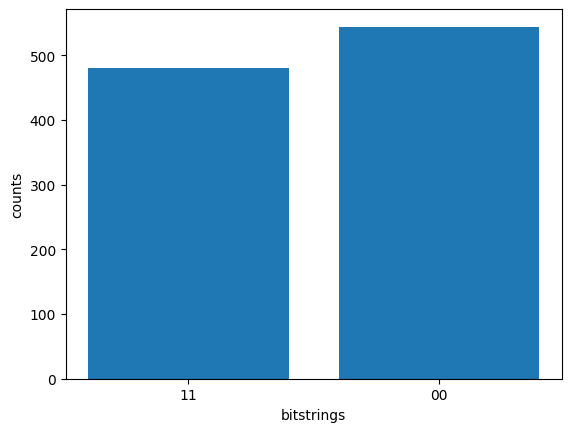

In [42]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

#비용 출력 코드

In [43]:
드print("Quantum Task Summary\n")
print(t.quantum_tasks_statistics())
print('\nNote: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. \nEstimated charges shown may differ from your actual charges. \nEstimated charges do not factor in any discounts or credits, \nand you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"\nEstimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.2f} USD")

Quantum Task Summary

{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 3024, 'tasks': {'COMPLETED': 3}, 'execution_duration': datetime.timedelta(microseconds=9000), 'billed_execution_duration': datetime.timedelta(seconds=9)}}

Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. 
Estimated charges shown may differ from your actual charges. 
Estimated charges do not factor in any discounts or credits, 
and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).

Estimated cost to run this example: 0.01 USD


# 기 수행이 완료된 task(job)을 복구해서 결과를 출력하는 법

In [30]:
from braket.aws import AwsQuantumTask

# Retrieve the task
retrieved_task = AwsQuantumTask("arn:aws:braket:us-east-1:727646499585:quantum-task/66691ef8-5f1f-4a66-a469-2663a6ce50c8")

In [31]:
result = retrieved_task.result()
result

GateModelQuantumTaskResult(task_metadata=TaskMetadata(braketSchemaHeader=BraketSchemaHeader(name='braket.task_result.task_metadata', version='1'), id='arn:aws:braket:us-east-1:727646499585:quantum-task/66691ef8-5f1f-4a66-a469-2663a6ce50c8', shots=1000, deviceId='arn:aws:braket:::device/quantum-simulator/amazon/sv1', deviceParameters=GateModelSimulatorDeviceParameters(braketSchemaHeader=BraketSchemaHeader(name='braket.device_schema.simulators.gate_model_simulator_device_parameters', version='1'), paradigmParameters=GateModelParameters(braketSchemaHeader=BraketSchemaHeader(name='braket.device_schema.gate_model_parameters', version='1'), qubitCount=2, disableQubitRewiring=False)), createdAt='2024-11-01T21:35:41.280Z', endedAt='2024-11-01T21:35:42.647Z', status='COMPLETED', failureReason=None), additional_metadata=AdditionalMetadata(action=Program(braketSchemaHeader=BraketSchemaHeader(name='braket.ir.openqasm.program', version='1'), source='OPENQASM 3.0;\nbit[2] b;\nqubit[2] q;\nh q[0];\nc

In [32]:
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 502, '11': 498})


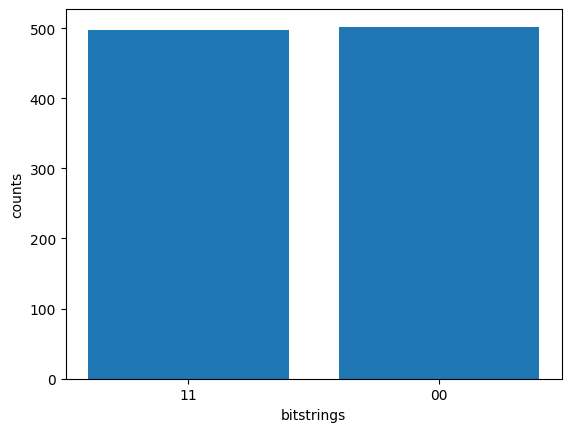

In [34]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');